In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [3]:
import os

print(os.listdir(path))


['spam.csv']


In [4]:
import pandas as pd
import os

file_path = os.path.join(path, "spam.csv")

# Load using correct separator, header, and encoding
df = pd.read_csv(file_path, encoding='latin1')

# Check available columns
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [5]:
df = df[['v1', 'v2']]  # Keep only relevant columns
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

print(df.head())
print(df['label'].value_counts())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64


In [6]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#Data preprocessing

1. conver to lower case

In [7]:
# Convert all messages to lowercase
df['message'] = df['message'].str.lower()

# Quick verification
print(df['message'].head(10))

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
5    freemsg hey there darling it's been 3 week's n...
6    even my brother is not like to speak with me. ...
7    as per your request 'melle melle (oru minnamin...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: message, dtype: object


2. Check for Html tags if any and remove if present

In [8]:
from bs4 import BeautifulSoup

# Check if any message contains HTML tags
html_present = df['message'].str.contains('<.*?>').any()

print("HTML tags present in dataset:", html_present)

HTML tags present in dataset: True


In [9]:
# If present, remove using BeautifulSoup
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

if html_present:
    df['message'] = df['message'].apply(remove_html)
    print("HTML tags removed.")

# Verify
print(df['message'].head(10))

HTML tags removed.
0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
5    freemsg hey there darling it's been 3 week's n...
6    even my brother is not like to speak with me. ...
7    as per your request 'melle melle (oru minnamin...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: message, dtype: object


3. Remove the puntiation marks

In [10]:
import string

# Create a translation table for removing punctuation
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
df['message'] = df['message'].apply(lambda x: x.translate(translator))

# Verify
print(df['message'].head(10))


0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
5    freemsg hey there darling its been 3 weeks now...
6    even my brother is not like to speak with me t...
7    as per your request melle melle oru minnaminun...
8    winner as a valued network customer you have b...
9    had your mobile 11 months or more u r entitled...
Name: message, dtype: object


4. Stop words removal

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Remove stopwords
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Verify
print(df['message'].head(10))


0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
5    freemsg hey darling 3 weeks word back id like ...
6       even brother like speak treat like aids patent
7    per request melle melle oru minnaminunginte nu...
8    winner valued network customer selected receiv...
9    mobile 11 months u r entitled update latest co...
Name: message, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


5. Creating tokens

In [12]:
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()

# def stem_tokens(tokens):
#     return [stemmer.stem(token) for token in tokens]

# # Apply stemming
# df['stemmed_tokens'] = df['tokens'].apply(stem_tokens)

# # View result
# print(df[['message', 'tokens', 'stemmed_tokens']].head())
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

def tokenize_text(text):
    return tokenizer.tokenize(text)

# But ensure you apply it on the correct column:
df['tokens'] = df['message'].apply(tokenize_text)

df


,label,message,tokens
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...,"[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,ham,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]"
5569,ham,pity mood soany suggestions,"[pity, mood, soany, suggestions]"
5570,ham,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b..."


In [13]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming
df['stemmed_tokens'] = df['tokens'].apply(stem_tokens)

df


,label,message,tokens,stemmed_tokens
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
...,...,...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...,"[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun..."
5568,ham,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]"
5569,ham,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5570,ham,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som..."


6. joining the stemmed words for feature extraction

In [14]:
# Join stemmed tokens into clean strings
df['clean_text'] = df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

df


,label,message,tokens,stemmed_tokens,clean_text
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though
...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...,"[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...",2nd time tri 2 contact u u å£750 pound prize 2...
5568,ham,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]",ì b go esplanad fr home
5569,ham,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]",piti mood soani suggest
5570,ham,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...",guy bitch act like id interest buy someth els ...


7. remove the numbers

In [15]:
# Remove purely numeric tokens from stemmed tokens
df['clean_text'] = df['stemmed_tokens'].apply(lambda tokens: ' '.join([token for token in tokens if not token.isnumeric()]))


#Feature extraction

TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (5572, 5000)


In [17]:
import pandas as pd

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame (careful: can be large in memory)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# View top 5 rows and top 10 columns
print(tfidf_df.iloc[:5, :10])


   0776xxxxxxx  0789xxxxxxx  0796xxxxxx  07xxxxxxxxx  08452810075over18  \
0          0.0          0.0         0.0          0.0           0.000000   
1          0.0          0.0         0.0          0.0           0.000000   
2          0.0          0.0         0.0          0.0           0.246854   
3          0.0          0.0         0.0          0.0           0.000000   
4          0.0          0.0         0.0          0.0           0.000000   

   08700621170150p  08701417012150p  08702840625comuk  08704439680tsc  \
0              0.0              0.0               0.0             0.0   
1              0.0              0.0               0.0             0.0   
2              0.0              0.0               0.0             0.0   
3              0.0              0.0               0.0             0.0   
4              0.0              0.0               0.0             0.0   

   0870737910216yr  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4    

label encoding the label column in the df dataframe

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


df


,label,message,tokens,stemmed_tokens,clean_text,label_encoded
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...,0
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri wkli comp win fa cup final tkt 21st...,1
3,ham,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say,0
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though,0
...,...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...,"[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...",2nd time tri contact u u å£750 pound prize cla...,1
5568,ham,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]",ì b go esplanad fr home,0
5569,ham,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]",piti mood soani suggest,0
5570,ham,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...",guy bitch act like id interest buy someth els ...,0


combine the dataframes

In [19]:
combined_df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
print(combined_df.shape)

combined_df


(5572, 5006)


,label,message,tokens,stemmed_tokens,clean_text,label_encoded,0776xxxxxxx,0789xxxxxxx,0796xxxxxx,07xxxxxxxxx,...,åè10,åð,åòharri,åòit,åômorrow,åôrent,ìll,ìï,ìïll,ûò
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri wkli comp win fa cup final tkt 21st...,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...,"[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...",2nd time tri contact u u å£750 pound prize cla...,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,ham,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]",ì b go esplanad fr home,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,ham,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]",piti mood soani suggest,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,ham,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...",guy bitch act like id interest buy someth els ...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Train test split

In [20]:
X = combined_df[tfidf_df.columns]
y = combined_df['label_encoded']

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())


X shape: (5572, 5000)
y distribution:
 label_encoded
0    4825
1     747
Name: count, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("--------------------------------------------------------")
print("Training labels distribution:\n", y_train.value_counts())
print("--------------------------------------------------------")
print("Test labels distribution:\n", y_test.value_counts())


Training set shape: (4457, 5000)
Test set shape: (1115, 5000)
--------------------------------------------------------
Training labels distribution:
 label_encoded
0    3859
1     598
Name: count, dtype: int64
--------------------------------------------------------
Test labels distribution:
 label_encoded
0    966
1    149
Name: count, dtype: int64


visualizing the x_train

/tmp/ipython-input-22-3493839370.py:14: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(),


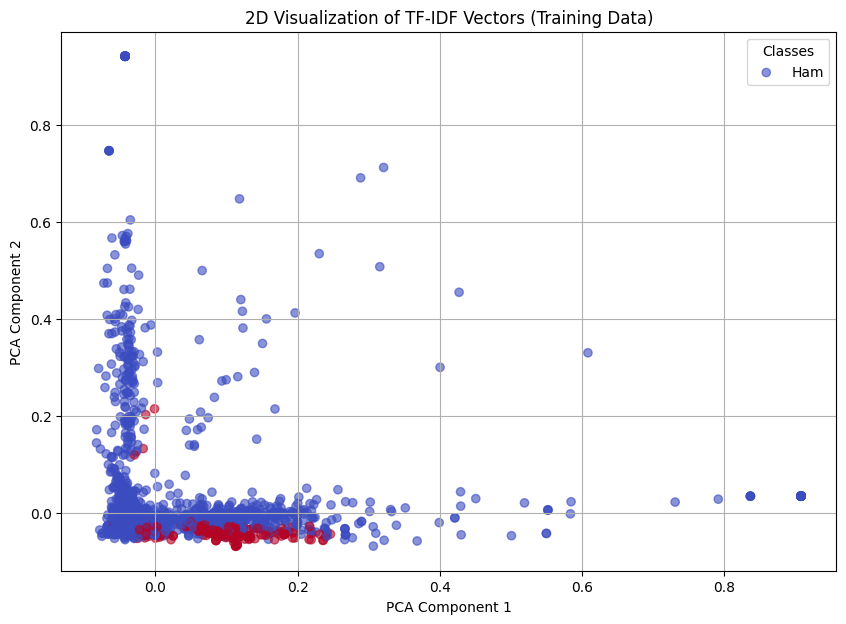

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                      c=y_train, cmap='coolwarm', alpha=0.6)

# Add legend
plt.legend(*scatter.legend_elements(),
           title="Classes", labels=["Ham", "Spam"])

plt.title("2D Visualization of TF-IDF Vectors (Training Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


#random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


In [24]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
y_pred = rf_clf.predict(X_test)


Random Forest Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



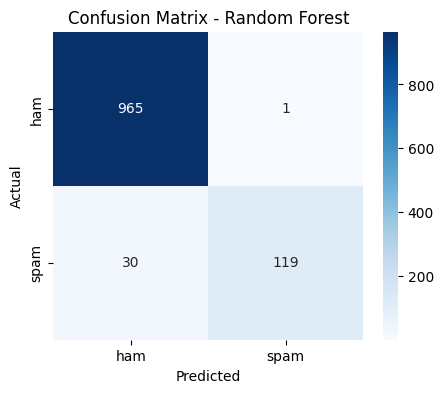

In [26]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


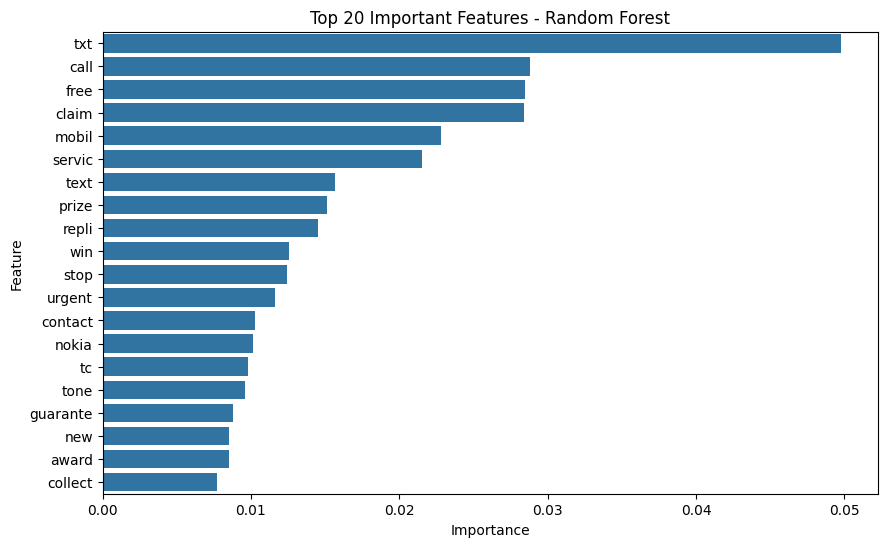

In [27]:
import numpy as np

# Get feature importances and feature names
importances = rf_clf.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Top 20
indices = np.argsort(importances)[::-1][:20]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 20 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


cross validation for random forest

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Use Stratified K-Fold to maintain label balance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [29]:
# Compute cross-validated accuracy
cv_scores = cross_val_score(rf_clf, X_tfidf, y, cv=skf, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation Scores: [0.97668161 0.98116592 0.97845601 0.97037702 0.97486535]
Mean Accuracy: 0.9763 ± 0.0036


In [30]:
cv_scores = cross_val_score(rf_clf, X_tfidf, y, cv=skf, scoring='f1', n_jobs=-1)


#XGBOOST

In [31]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the model
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:32:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [32]:
# Predict
y_pred = xgb_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Random Forest Accuracy: 0.9686
Confusion Matrix:
 [[958   8]
 [ 27 122]]
              precision    recall  f1-score   support

         Ham       0.97      0.99      0.98       966
        Spam       0.94      0.82      0.87       149

    accuracy                           0.97      1115
   macro avg       0.96      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



/tmp/ipython-input-33-3688305410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


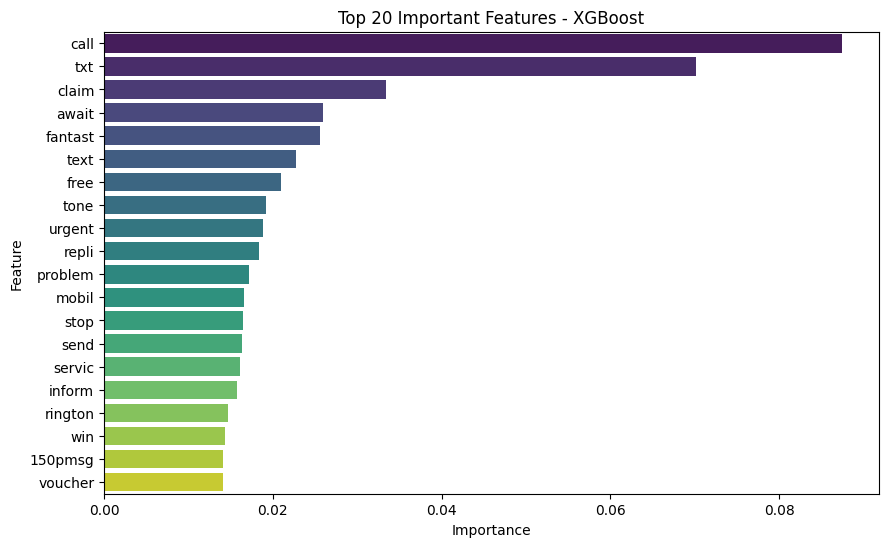

In [33]:
import numpy as np

# Get feature importances and feature names
xgb_importances = xgb_clf.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Top 20
indices = np.argsort(xgb_importances)[::-1][:20]
top_features = [feature_names[i] for i in indices]
top_importances = xgb_importances[indices]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title("Top 20 Important Features - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<Figure size 1000x600 with 0 Axes>

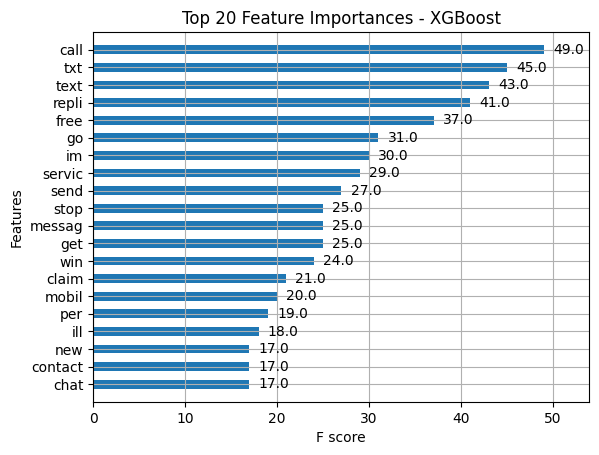

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_clf, max_num_features=20, height=0.5)
plt.title("Top 20 Feature Importances - XGBoost")
plt.show()


cross validation on XGBOOST

In [35]:
# Using accuracy as scoring metric, you can also use 'f1', 'precision', 'recall'
cv_scores = cross_val_score(
    xgb_clf,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print(f"Cross-validation accuracies: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Cross-validation accuracies: [0.96412556 0.97197309 0.96969697 0.95510662 0.95735129]
Mean CV accuracy: 0.9637
Standard deviation: 0.0066


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9731
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



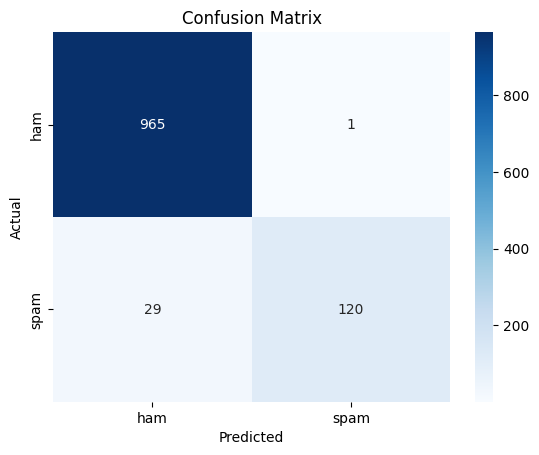

Prediction for test message: ham


In [36]:
import pandas as pd
import numpy as np
import string
from bs4 import BeautifulSoup
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Ensure NLTK downloads
import nltk
nltk.download('stopwords')

# Custom preprocessing transformer
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.tokenizer = TreebankWordTokenizer()
        self.stemmer = PorterStemmer()
        self.translator = str.maketrans('', '', string.punctuation)

    def clean_text(self, text):
        # Lowercase
        text = text.lower()
        # Remove HTML
        text = BeautifulSoup(text, "html.parser").get_text()
        # Remove punctuation
        text = text.translate(self.translator)
        # Tokenize
        tokens = self.tokenizer.tokenize(text)
        # Remove stopwords
        tokens = [t for t in tokens if t not in self.stop_words]
        # Stemming
        tokens = [self.stemmer.stem(t) for t in tokens]
        # Remove numeric-only tokens
        tokens = [t for t in tokens if not t.isnumeric()]
        # Join back
        return ' '.join(tokens)

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.apply(self.clean_text)

# Label encoder for decoding predictions
label_encoder = LabelEncoder()
label_encoder.fit(['ham', 'spam'])  # Ensure consistent encoding

# Build the pipeline
pipeline = Pipeline([
    ('preprocessing', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# --------------------------
# 1️⃣ Load and prepare data
import kagglehub
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
file_path = os.path.join(path, "spam.csv")

df = pd.read_csv(file_path, encoding='latin1')[['v1', 'v2']]
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# Encode labels
df['label_encoded'] = label_encoder.transform(df['label'])

# --------------------------
# 2️⃣ Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['message'],
    df['label_encoded'],
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# --------------------------
# 3️⃣ Fit the pipeline
pipeline.fit(X_train, y_train)

# --------------------------
# 4️⃣ Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --------------------------
# 5️⃣ Predict on new messages easily
def predict_message(message):
    pred = pipeline.predict(pd.Series([message]))[0]
    label = label_encoder.inverse_transform([pred])[0]
    return label

# Test
test_message = "Congratulations! You've won a free ticket to Bahamas. Call now!"
print("Prediction for test message:", predict_message(test_message))


#save the pipeline

In [37]:
import joblib

# Save pipeline
joblib.dump(pipeline, "spam_detection_pipeline.pkl")
print("Pipeline saved successfully.")


Pipeline saved successfully.


#downloading the pipeline to local pc

In [38]:
from google.colab import files
files.download("spam_detection_pipeline.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>